# ClusterAI 2020
# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521
# Machine Learning

**Alumnos:**
###          Gomez Lucas
###          Sabini Manuel
###          Tudanca Valentin 

**Mentor:**
###          Lautaro Rshaid

El Dataset sobre el cual se realiza el siguiente Trabajo fue obtenido desde el portal de datos abiertos de la Nacion Argentina.

El mismo fue confeccionado en el Año 2018 por el Ministerio de Salud. Dirección de Estadística e Información en Salud (DEIS)

Nacidos vivos registrados año 2018
Dataset: https://datos.gob.ar/dataset/salud-nacidos-vivos-registrados-por-jurisdiccion-residencia-madre---republica-argentina/archivo/salud_e1ae5157-2a94-4e2a-b147-43da647facc1

### Librerias

In [1]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1001-875D

 Directory of C:\Users\60065215\Desktop\Facultad\Ciencia de Datos\TP Grupal\TP\Entrega

11/18/2020  07:22 PM    <DIR>          .
11/18/2020  07:22 PM    <DIR>          ..
11/18/2020  03:59 PM    <DIR>          .ipynb_checkpoints
11/18/2020  03:52 PM           557,131 clusterai_Nombre_apellido_EDA.ipynb
11/18/2020  09:09 AM           221,534 clusterai_Nombre_apellido_Machine_Learning v1.ipynb
11/18/2020  07:22 PM           150,044 clusterai_Nombre_apellido_Machine_Learningv2.ipynb
11/17/2020  11:55 PM           587,451 clusterai_TP_eda+SVM v5.ipynb
11/16/2020  12:07 AM        15,828,888 export_nacidos.csv
11/18/2020  12:06 PM        51,183,926 export_nacidos_dummies.csv
11/17/2020  05:03 PM         3,464,459 nacidos-vivos-registrados-2018_deis.csv
               7 File(s)     71,993,433 bytes
               3 Dir(s)  358,488,268,800 bytes free


In [3]:
#Importamos el Dataset
nacidos = pd.read_csv('nacidos-vivos-registrados-2018_deis.csv')

In [4]:
#Visualizamos las primeras líneas del Dataset
nacidos.head()

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,34,Formosa,1,Simple,2,Mujer,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,5,2000 a 2499,3
1,2,Ciudad Aut. de Buenos Aires,1,Simple,1,Varón,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,6,2500 a 2999,13
2,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
3,82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,5,2000 a 2499,30
4,74,San Luis,1,Simple,1,Varón,6,35 a 39,5,32 a 36,5,Secundaria/Polimodal Completa,6,2500 a 2999,4


In [5]:
#Vemos cuántas filas y columnas tiene
# Ver que utilizamos la función de numpy "shape".
print("El dataset importado tiene "+ str(np.shape(nacidos)[0]) + " renglones y " + str(np.shape(nacidos)[1]) + " columnas")

El dataset importado tiene 30099 renglones y 15 columnas


In [6]:
# Verificamos si hay valores nulos en el Dataset
col_nulls = nacidos.isnull().any()
col_nulls

jurisdiccion_de_residencia_id         False
jurisdiccion_de_residencia_nombre     False
tipo_de_parto_id                      False
tipo_de_parto_nombre                  False
sexo                                  False
sexo_nombre                           False
edad_de_la_madre_grupos_id            False
edad_de_la_madre_grupos_nombre        False
semanas_de_gestacion_id               False
semanas_de_gestacion_nombre           False
instruccion_de_la_madre_id            False
instruccion_de_la_madre_nombre        False
Intervalos_de_peso_al_nacer_id        False
intervalos_de_peso_al_nacer_nombre    False
cantidad_nacimientos                  False
dtype: bool

In [7]:
# Me guardo en un array los nombres de las columnas
columns_nacidos = nacidos.columns
columns_nacidos

Index(['jurisdiccion_de_residencia_id', 'jurisdiccion_de_residencia_nombre',
       'tipo_de_parto_id', 'tipo_de_parto_nombre', 'sexo', 'sexo_nombre',
       'edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre',
       'semanas_de_gestacion_id', 'semanas_de_gestacion_nombre',
       'instruccion_de_la_madre_id', 'instruccion_de_la_madre_nombre',
       'Intervalos_de_peso_al_nacer_id', 'intervalos_de_peso_al_nacer_nombre',
       'cantidad_nacimientos'],
      dtype='object')

In [8]:
#Vamos a ver los valores que tenemos en cada columna

for i in range(14):
        print('La columna '+ str(columns_nacidos[i])+' tiene '+ str(len(nacidos[columns_nacidos[i]].unique()))+' valores distintos')
        print('Los valores son: \n'+str(nacidos[columns_nacidos[i]].unique())+'\n')

La columna jurisdiccion_de_residencia_id tiene 26 valores distintos
Los valores son: 
[34  2  6 82 74 99 66 58 62 54 90 78 10 86 22 46 42 38 30 50 26 18 14 70
 94 98]

La columna jurisdiccion_de_residencia_nombre tiene 26 valores distintos
Los valores son: 
['Formosa' 'Ciudad Aut. de Buenos Aires' 'Buenos Aires' 'Santa Fe'
 'San Luis' 'Lugar no especificado' 'Salta' 'Neuquén' 'Río Negro'
 'Misiones' 'Tucumán' 'Santa Cruz' 'Catamarca' 'Santiago del Estero'
 'Chaco' 'La Rioja' 'La Pampa' 'Jujuy' 'Entre Ríos' 'Mendoza' 'Chubut'
 'Corrientes' 'Córdoba' 'San Juan' 'Tierra del Fuego' 'Otro país']

La columna tipo_de_parto_id tiene 3 valores distintos
Los valores son: 
[1 2 9]

La columna tipo_de_parto_nombre tiene 3 valores distintos
Los valores son: 
['Simple' 'Múltiple' 'Sin especificar']

La columna sexo tiene 4 valores distintos
Los valores son: 
[2 1 9 3]

La columna sexo_nombre tiene 4 valores distintos
Los valores son: 
['Mujer' 'Varón' 'Sin espeficar' 'Indeterminado']

La columna eda

##### Vemos que varias columnas indican 'Sin especificar' es decir no tienen información.  Debemos ver que porcentaje de cada una tiene esta situación para poder tomar una decision.

In [9]:
#Veo que existen algunas columnas que tienen mal escrito "Sin especificar". Hago el reemplazo
nacidos['sexo_nombre']= nacidos['sexo_nombre'].str.replace('Sin espeficar','Sin especificar')
nacidos['jurisdiccion_de_residencia_nombre']= nacidos['jurisdiccion_de_residencia_nombre'].str.replace('Lugar no especificado','Sin especificar')

In [10]:
# Creo un Dataframe donde guardaré el % de valores sin especificar para cada columna
sin_esp = pd.DataFrame(columns = ['Column_name','% valores Sin especificar'])

In [11]:
#Verificamos que porcentaje de valores sin especificar tenemos para cada columna
for t in [1,3,5,7,9,11,13]:
    se = nacidos.loc[nacidos[columns_nacidos[t]] == 'Sin especificar']
    cant = round(((se.shape[0]/nacidos.shape[0])*100),2)
    new_row = {'Column_name':columns_nacidos[t],'% valores Sin especificar': cant}
    sin_esp = sin_esp.append(new_row,ignore_index = True)
sin_esp

,Column_name,% valores Sin especificar
0,jurisdiccion_de_residencia_nombre,2.15
1,tipo_de_parto_nombre,0.66
2,sexo_nombre,2.19
3,edad_de_la_madre_grupos_nombre,2.51
4,semanas_de_gestacion_nombre,6.01
5,instruccion_de_la_madre_nombre,8.86
6,intervalos_de_peso_al_nacer_nombre,3.80


###### Assumption: Para tener la cantidad de nacidos y no de nacimientos se multiplica la columna que indica el tipo de parto con la de cantidad de nacimientos. Encontramos qeu esta columna tiene algunos valores sin especificar y además la clasificación de tipo de parto, sólo indica "Simple" o "Múltiple". Se supuso lo siguiente:

- Los valores sin especificar corresponden a nacimientos Simples
- Los nacimientos múltiples corresponden a nacimientos de dos bebés y no más.

In [12]:
#Se sacan del dataset los datos que no indican la jurisdicción de residencia.
nacidos=nacidos.drop(nacidos[nacidos["jurisdiccion_de_residencia_nombre"] == 'Sin especificar'].index)

In [13]:
#Asumo que siempre que "Tipo_de_parto_nombre" sea sin especificar será un nacimiento simple.
nacidos['tipo_de_parto_id'].replace('9', 1, inplace = True )
nacidos['tipo_de_parto_nombre'].replace('Sin especificar', 'Simple', inplace = True )

In [14]:
#Agregamos una columna con la cantidad real de bebés nacidos teniendo en cuenta que hay nacimientos múltiples
nacidos['nacidos'] = nacidos['tipo_de_parto_id']*nacidos['cantidad_nacimientos']
nacidos.tail()

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos,nacidos
30094,18,Corrientes,1,Simple,1,Varón,9,Sin especificar,6,37 a 41,3,Primaria/C. EGB Completa,8,De 3500 y más,2,2
30095,34,Formosa,1,Simple,1,Varón,4,25 a 29,4,28 a 31,8,Sin especificar,8,De 3500 y más,1,1
30096,86,Santiago del Estero,1,Simple,2,Mujer,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,5,2000 a 2499,5,5
30097,6,Buenos Aires,2,Múltiple,9,Sin especificar,4,25 a 29,8,Sin especificar,8,Sin especificar,9,Sin especificar,2,4
30098,70,San Juan,2,Múltiple,2,Mujer,4,25 a 29,5,32 a 36,5,Secundaria/Polimodal Completa,5,2000 a 2499,4,8


In [15]:
#Se eliminan las features que tienen los ids de identificación manteniendo las que poseen los nombres.
nacidos_prep=nacidos.drop(['jurisdiccion_de_residencia_id','tipo_de_parto_id','sexo','edad_de_la_madre_grupos_id','instruccion_de_la_madre_id','cantidad_nacimientos','semanas_de_gestacion_id','intervalos_de_peso_al_nacer_nombre'], axis=1)
nacidos_prep

,jurisdiccion_de_residencia_nombre,tipo_de_parto_nombre,sexo_nombre,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,nacidos
0,Formosa,Simple,Mujer,25 a 29,32 a 36,Primaria/C. EGB Completa,5,3
1,Ciudad Aut. de Buenos Aires,Simple,Varón,40 a 44,37 a 41,Primaria/C. EGB Completa,6,13
2,Buenos Aires,Simple,Varón,30 a 34,Sin especificar,Terciaria/Universitaria Comple,4,1
3,Santa Fe,Simple,Mujer,35 a 39,37 a 41,Terciaria/Universitaria Comple,5,30
4,San Luis,Simple,Varón,35 a 39,32 a 36,Secundaria/Polimodal Completa,6,4
...,...,...,...,...,...,...,...,...
30094,Corrientes,Simple,Varón,Sin especificar,37 a 41,Primaria/C. EGB Completa,8,2
30095,Formosa,Simple,Varón,25 a 29,28 a 31,Sin especificar,8,1
30096,Santiago del Estero,Simple,Mujer,40 a 44,37 a 41,Primaria/C. EGB Completa,5,5
30097,Buenos Aires,Múltiple,Sin especificar,25 a 29,Sin especificar,Sin especificar,9,4


Debido a que nuestro dataset original está "preprocesado" lo que haremos es volver atras y descomponerlo. En nuestro dataset cada linea representa una combinacion de caracteristicas que tienen los niños al nacer y en la ultima feature de la sample indica la cantidad de niños que tienen esas caracteristicas. Lo que buscamos es pasar a un Dataset que contenga un sample por cada recien nacido. (Esta linea de codigo puede durar varios minutos, aprox=10min)


In [ ]:
samples = np.shape(nacidos_prep)[0]
n_col= nacidos_prep.shape[1]-1

In [ ]:
for j in range(samples):
    registro_a_repetir = nacidos_prep.iloc[j, :]
    n=nacidos_prep.iloc[j, n_col]-1
    nacidos_prep=nacidos_prep.append(([registro_a_repetir]*n), ignore_index=True)

In [ ]:
nacidos_prep=nacidos_prep.drop(['nacidos'], axis=1)
nacidos_prep.shape

In [ ]:
nacidos_prep.head()

In [ ]:
nacidos_prep.to_csv (r'C:\Users\60065215\Desktop\Facultad\Ciencia de Datos\TP Grupal\TP\export_nacidos_dummies.csv', index = False, header=True)

## **Machine Learning**

In [16]:
nacidos_prep = pd.read_csv('export_nacidos_dummies.csv')
nacidos_prep

,jurisdiccion_de_residencia_nombre,tipo_de_parto_nombre,sexo_nombre,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id
0,Formosa,Simple,Mujer,25 a 29,32 a 36,Primaria/C. EGB Completa,5
1,Ciudad Aut. de Buenos Aires,Simple,Varón,40 a 44,37 a 41,Primaria/C. EGB Completa,6
2,Buenos Aires,Simple,Varón,30 a 34,Sin especificar,Terciaria/Universitaria Comple,4
3,Santa Fe,Simple,Mujer,35 a 39,37 a 41,Terciaria/Universitaria Comple,5
4,San Luis,Simple,Varón,35 a 39,32 a 36,Secundaria/Polimodal Completa,6
...,...,...,...,...,...,...,...
699481,San Juan,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699482,San Juan,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699483,San Juan,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699484,San Juan,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5


Lo que se buscara realizar en este apartado es entrenar un modelo que permita predecir con algunos parametros el peso con el que nacen los bebes.


Dado que todas las variables presentes en el dataset son categóricas se buscará la creación de Dummies Features para entrenar los modelos.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

En primera instancia se limpian los registros que no poseen información e indican "Sin especificar" y se asignan las labels de bajo peso o peso normal.

In [18]:
nacidos_ML=nacidos_prep
nacidos_ML=nacidos_ML.drop(nacidos_ML[nacidos_prep["sexo_nombre"] == "Sin especificar"].index)
nacidos_ML=nacidos_ML.drop(nacidos_ML[nacidos_prep["edad_de_la_madre_grupos_nombre"] == "Sin especificar"].index)
nacidos_ML=nacidos_ML.drop(nacidos_ML[nacidos_prep["semanas_de_gestacion_nombre"] == "Sin especificar"].index)
nacidos_ML=nacidos_ML.drop(nacidos_ML[nacidos_prep["instruccion_de_la_madre_nombre"] == "Sin especificar"].index)
nacidos_ML=nacidos_ML.drop(nacidos_ML[nacidos_prep["Intervalos_de_peso_al_nacer_id"] == 9].index)
nacidos_ML=nacidos_ML.drop('jurisdiccion_de_residencia_nombre',axis=1)
nacidos_ML

,tipo_de_parto_nombre,sexo_nombre,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id
0,Simple,Mujer,25 a 29,32 a 36,Primaria/C. EGB Completa,5
1,Simple,Varón,40 a 44,37 a 41,Primaria/C. EGB Completa,6
3,Simple,Mujer,35 a 39,37 a 41,Terciaria/Universitaria Comple,5
4,Simple,Varón,35 a 39,32 a 36,Secundaria/Polimodal Completa,6
5,Simple,Varón,20 a 24,37 a 41,Primaria/C. EGB Incompleta,7
...,...,...,...,...,...,...
699481,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699482,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699483,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5
699484,Múltiple,Mujer,25 a 29,32 a 36,Secundaria/Polimodal Completa,5


In [19]:
#Vamos a hacer una clasificacion binaria del peso dividiendo entre bajo y normal
bins = (0, 6.5, 10)
group_names = ['Bajo', 'Normal']
nacidos_ML['Intervalos_de_peso_al_nacer_id'] = pd.cut(nacidos_ML['Intervalos_de_peso_al_nacer_id'], bins = bins, labels = group_names)
#Ahora utilizamos el encoder de sklearn
label_quality = LabelEncoder() #from sklearn.preprocessing, sirve para transformar los valores entre 0 y n_clases-1
#Bajo es 0 y Normal es 1 
nacidos_ML['Intervalos_de_peso_al_nacer_id'] = label_quality.fit_transform(nacidos_ML['Intervalos_de_peso_al_nacer_id'])
nacidos_ML['Intervalos_de_peso_al_nacer_id'].value_counts()

1    463548
0    164953
Name: Intervalos_de_peso_al_nacer_id, dtype: int64

Como podemos observar solo el 26% de los bebes nacen con un peso bajo. Esto podria generar un problema a la hora de entrenar debido que nuestro modelo estara entrenado con muchos mas samples de bebes que tienen un peso adecuado frente a los que tienen dicho problema.

In [20]:
nacidos_ML.head()

,tipo_de_parto_nombre,sexo_nombre,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id
0,Simple,Mujer,25 a 29,32 a 36,Primaria/C. EGB Completa,0
1,Simple,Varón,40 a 44,37 a 41,Primaria/C. EGB Completa,0
3,Simple,Mujer,35 a 39,37 a 41,Terciaria/Universitaria Comple,0
4,Simple,Varón,35 a 39,32 a 36,Secundaria/Polimodal Completa,0
5,Simple,Varón,20 a 24,37 a 41,Primaria/C. EGB Incompleta,1


In [21]:
#Genero Dummies para todas las features que utilizaré como independientes
tipo_parto = pd.get_dummies(nacidos_ML.tipo_de_parto_nombre)
sexo = pd.get_dummies(nacidos_ML.sexo_nombre)
edad_madre = pd.get_dummies(nacidos_ML.edad_de_la_madre_grupos_nombre)
gestacion = pd.get_dummies(nacidos_ML.semanas_de_gestacion_nombre)
instruccion = pd.get_dummies(nacidos_ML.instruccion_de_la_madre_nombre)


In [22]:
#Concateno el dataframe original con el dataframe generado con dummies
nacidos_dummies = pd.concat([nacidos_ML,tipo_parto, sexo, edad_madre, gestacion, instruccion], axis=1)
nacidos_dummies = nacidos_dummies.drop(['tipo_de_parto_nombre','sexo_nombre','edad_de_la_madre_grupos_nombre','semanas_de_gestacion_nombre','instruccion_de_la_madre_nombre'], axis = 1)
nacidos_dummies

,Intervalos_de_peso_al_nacer_id,Múltiple,Simple,Indeterminado,Mujer,Varón,15 a 19,20 a 24,25 a 29,30 a 34,...,37 a 41,42 y más,Menos de 22,Primaria/C. EGB Completa,Primaria/C. EGB Incompleta,Secundaria/Polimodal Completa,Secundaria/Polimodal Incomplet,Sin instrucción,Terciaria/Universitaria Comple,Terciaria/Universitaria Incomp
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699481,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
699482,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
699483,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
699484,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Por la cantidad de recursos de computo que se requieren para realizar el aprendizaje con mas de 600000 samples, decidimos solo entrenar con 5000 elegidas al azar dentro del Dataset.

In [23]:
nacidos_muestra = nacidos_dummies.sample(n=5000, axis=0, random_state=13)
nacidos_muestra.shape

(5000, 28)

De esas 5000 las etiquetas que aparecen son las siguientes.

In [24]:
nacidos_muestra['Intervalos_de_peso_al_nacer_id'].value_counts()

1    3695
0    1305
Name: Intervalos_de_peso_al_nacer_id, dtype: int64

## Clasificación de los pesos

Dividimos en Train y test, scalamos y entrenamos con diferentes modelos.
Los Features con las que entrenaremos son:

*   Edad de la madre
*   Semana de gestacion a la hora de nacer
*   Instruccion de la madre
*   Sexo
*   Tipo de parto



In [25]:
X = nacidos_muestra.drop('Intervalos_de_peso_al_nacer_id', axis = 1)
y = nacidos_muestra['Intervalos_de_peso_al_nacer_id']

In [26]:
#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 14)

In [27]:
#Aplicamos standard scaler para optimizar los resultados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### SVM

In [28]:
#Buscamos mejores parametros usando CV
svc = SVC()
param = {
    'C': [1, 10, 100, 1000],
    'kernel':['rbf'],
    'gamma' :[0.0001,0.001, 0.01, 0.1,1, 10,100]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=4)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [29]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [30]:
pred_svc_cv =grid_svc.predict(X_test)
print(classification_report(y_test, pred_svc_cv))

              precision    recall  f1-score   support

           0       0.84      0.34      0.49       635
           1       0.81      0.98      0.89      1865

    accuracy                           0.82      2500
   macro avg       0.82      0.66      0.69      2500
weighted avg       0.82      0.82      0.79      2500



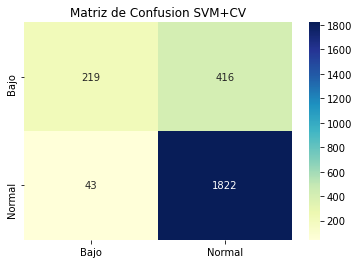

In [31]:
cm_svm_gs =confusion_matrix(y_test, pred_svc_cv)
confmat = pd.DataFrame(cm_svm_gs, index = ['Bajo', 'Normal'], columns = ['Bajo', 'Normal'])
plt.figure(figsize = (6,4))
sns.heatmap(confmat, annot=True,cmap='YlGnBu', fmt="d")
plt.title('Matriz de Confusion SVM+CV')
plt.show()

In [32]:
cm_svm_gs

array([[ 219,  416],
       [  43, 1822]], dtype=int64)

#### Metodo KNN

In [33]:
parameters = {'n_neighbors':[1, 3, 5, 10, 25, 50]}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid = parameters, refit= True, cv = 5)

clf_knn.fit(X_train, y_train)
ypred_knn_gs=clf_knn.predict(X_test)

In [34]:
print(classification_report(y_test, ypred_knn_gs))

              precision    recall  f1-score   support

           0       0.85      0.34      0.48       635
           1       0.81      0.98      0.89      1865

    accuracy                           0.82      2500
   macro avg       0.83      0.66      0.69      2500
weighted avg       0.82      0.82      0.79      2500



Hacemos una matriz de confusion para ver los resultados obtenidos, armamos un reporte y vemos con cuantos K vecinos se obtuvieron los mejores resultados.

In [35]:
#cantidad de vecinos
clf_knn.best_params_

{'n_neighbors': 25}

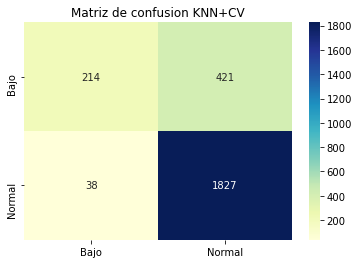

In [36]:
cm_knn = confusion_matrix(y_test, ypred_knn_gs)
confmat = pd.DataFrame(cm_knn, index = ['Bajo', 'Normal'], columns = ['Bajo', 'Normal'])
plt.figure(figsize = (6,4))
sns.heatmap(confmat, annot=True,cmap='YlGnBu', fmt="d")
plt.title('Matriz de confusion KNN+CV')
plt.show()

In [37]:
cm_knn

array([[ 214,  421],
       [  38, 1827]], dtype=int64)

#### Logistic Regresion

In [38]:
parameters = {'C':[1, 10, 100, 1000]}
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)

In [39]:
clf_lr.fit(X_train, y_train)
ypred_lr_gs=clf_lr.predict(X_test)
print(classification_report(y_test, ypred_lr_gs))

              precision    recall  f1-score   support

           0       0.84      0.34      0.49       635
           1       0.81      0.98      0.89      1865

    accuracy                           0.82      2500
   macro avg       0.82      0.66      0.69      2500
weighted avg       0.82      0.82      0.79      2500



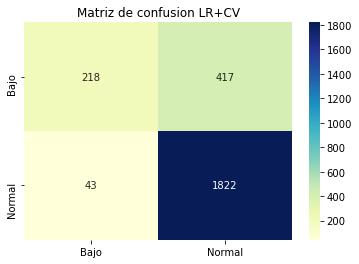

In [40]:
cm_lr_gs = confusion_matrix(y_test, ypred_lr_gs)
confmat = pd.DataFrame(cm_lr_gs, index = ['Bajo', 'Normal'], columns = ['Bajo', 'Normal'])
plt.figure(figsize = (6,4))
sns.heatmap(confmat, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Matriz de confusion LR+CV')
plt.show()

In [41]:
cm_lr_gs

array([[ 218,  417],
       [  43, 1822]], dtype=int64)